<a href="https://colab.research.google.com/github/euihakheo1/DataScience/blob/master/%EC%9E%90%EB%8F%99%EC%B0%A8_%EB%A6%AC%EC%BD%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
# missingno라는 라이브러리가 설치되어 있을 경우 import
#결측치 예측 라이브러리
try:
    import missingno as msno
# missingno라는 라이브러리가 설치되어 있지 않을 경우 설치 후 import
except:
    !pip install missingno
    import missingno as msno

0.9.0


In [5]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
df = pd.read_csv("/content/drive/MyDrive/구글클라우드교육/코드/한국교통안전공단_자동차결함 리콜현황_20221231.csv", encoding="euc-kr")

# 상위 5개 데이터를 출력합니다.
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [6]:
# 하위 5개 데이터를 출력합니다.
df.tail()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
1418,화창상사(주),CHIEF VINTAGE,2019-08-02,2020-06-04,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [7]:
# dataframe 정보를 요약하여 출력합니다.
#결측치 예측
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1419 non-null   object
 1   차명        1419 non-null   object
 2   생산기간(부터)  1419 non-null   object
 3   생산기간(까지)  1419 non-null   object
 4   리콜개시일     1419 non-null   object
 5   리콜사유      1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB


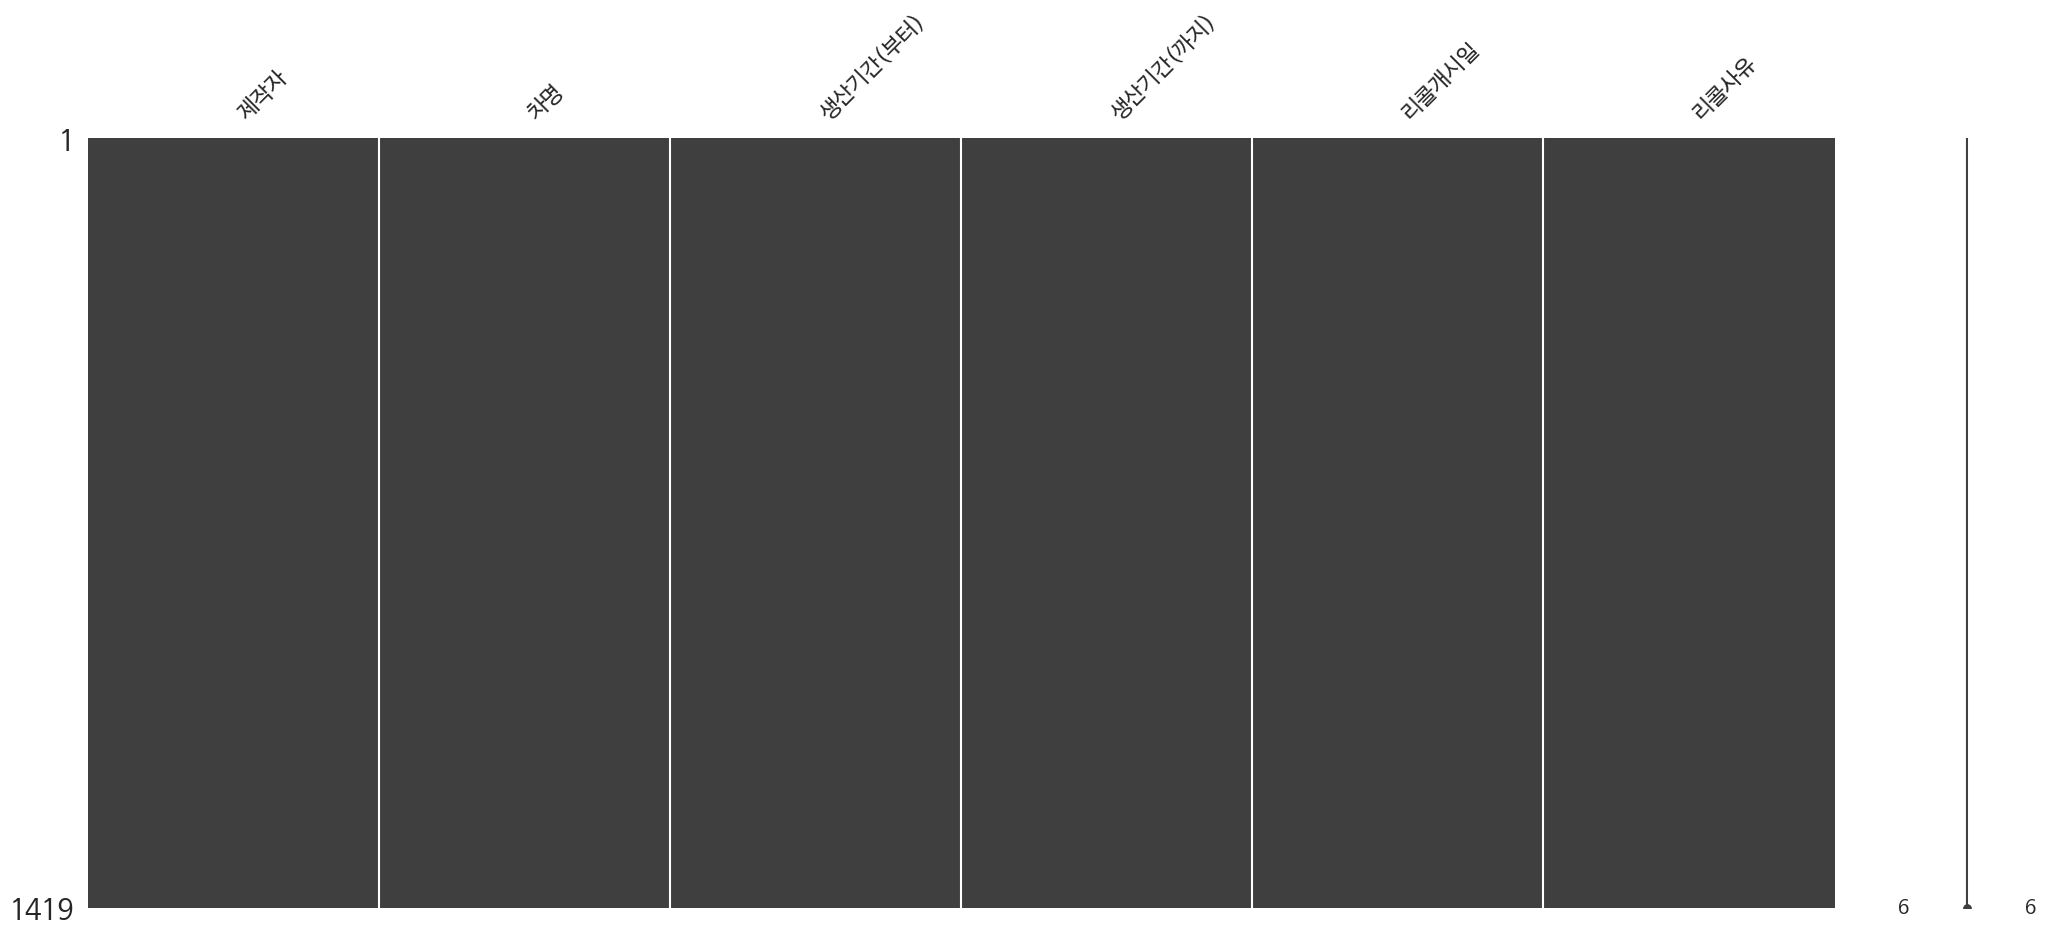

In [8]:
# 결측치 시각 확인
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False})
msno.matrix(df)
plt.show()

In [9]:
# 각 열 별로 결측치의 갯수를 반환합니다. (True:1, False:0)
df.isna().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [10]:
# 중복값 확인
df[df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
303,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
392,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
527,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [11]:
# 중복값 제거, 확인
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))

Before: 1419
After: 1414


In [12]:
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

# Pandas DataFrame에서는 row별로 loop를 도는 것이 굉장히 느리기 때문에, apply() 함수를 이용하여 벡터 연산을 진행합니다.
df['start_year'] = df['생산기간(부터)'].apply(parse_year)
df['start_month'] = df['생산기간(부터)'].apply(parse_month)
df['start_day'] = df['생산기간(부터)'].apply(parse_day)

df['end_year'] = df['생산기간(까지)'].apply(parse_year)
df['end_month'] = df['생산기간(까지)'].apply(parse_month)
df['end_day'] = df['생산기간(까지)'].apply(parse_day)

df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

df.tail(3)

<ipython-input-12-3f2129c5e86f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_year'] = df['생산기간(부터)'].apply(parse_year)
<ipython-input-12-3f2129c5e86f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_month'] = df['생산기간(부터)'].apply(parse_month)
<ipython-input-12-3f2129c5e86f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,2020,2,11,2022,4,29,2022,12,27
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,2019,10,28,2020,6,3,2022,12,27
1418,화창상사(주),CHIEF VINTAGE,2019-08-02,2020-06-04,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,2019,8,2,2020,6,4,2022,12,27


In [13]:
# 2022년의 데이터만 존재함을 알 수 있습니다.
df.recall_year.min(), df.recall_year.max()

(2022, 2022)

In [14]:
df.groupby("제작자").count()["차명"].sort_values(ascending=False)

제작자
비엠더블유코리아(주)         432
메르세데스벤츠코리아(주)       329
폭스바겐그룹코리아 주식회사      216
현대자동차(주)             61
만트럭버스코리아(주)          41
기아주식회사               38
포드세일즈서비스코리아(유)       37
(주)에프엠케이             31
스텔란티스코리아주식회사         31
(주)재규어랜드로버코리아        24
(유)기흥모터스             21
포르쉐코리아 주식회사          20
테슬라코리아 유한회사          20
화창상사(주)              16
혼다코리아(주)             15
(주)볼보자동차코리아          13
스카니아코리아그룹(주)          9
다임러트럭코리아(주)           9
르노코리아자동차 주식회사         7
한국토요타자동차(주)           5
(주)피라인                5
지엠코리아(주)              4
범한자동차 주식회사            4
볼보트럭코리아(주)            4
대전기계공업(주)             3
(주) 바이크코리아            3
한국지엠(주)               3
(주) 한국모터트레이딩          3
(주)다산중공업              2
모토스타코리아(주)            2
기흥인터내셔널 유한회사          1
유한회사 모토로싸             1
주식회사 마이브              1
(주)스포츠모터사이클코리아        1
폴스타오토모티브코리아 유한회사      1
한신특장                  1
Name: 차명, dtype: int64

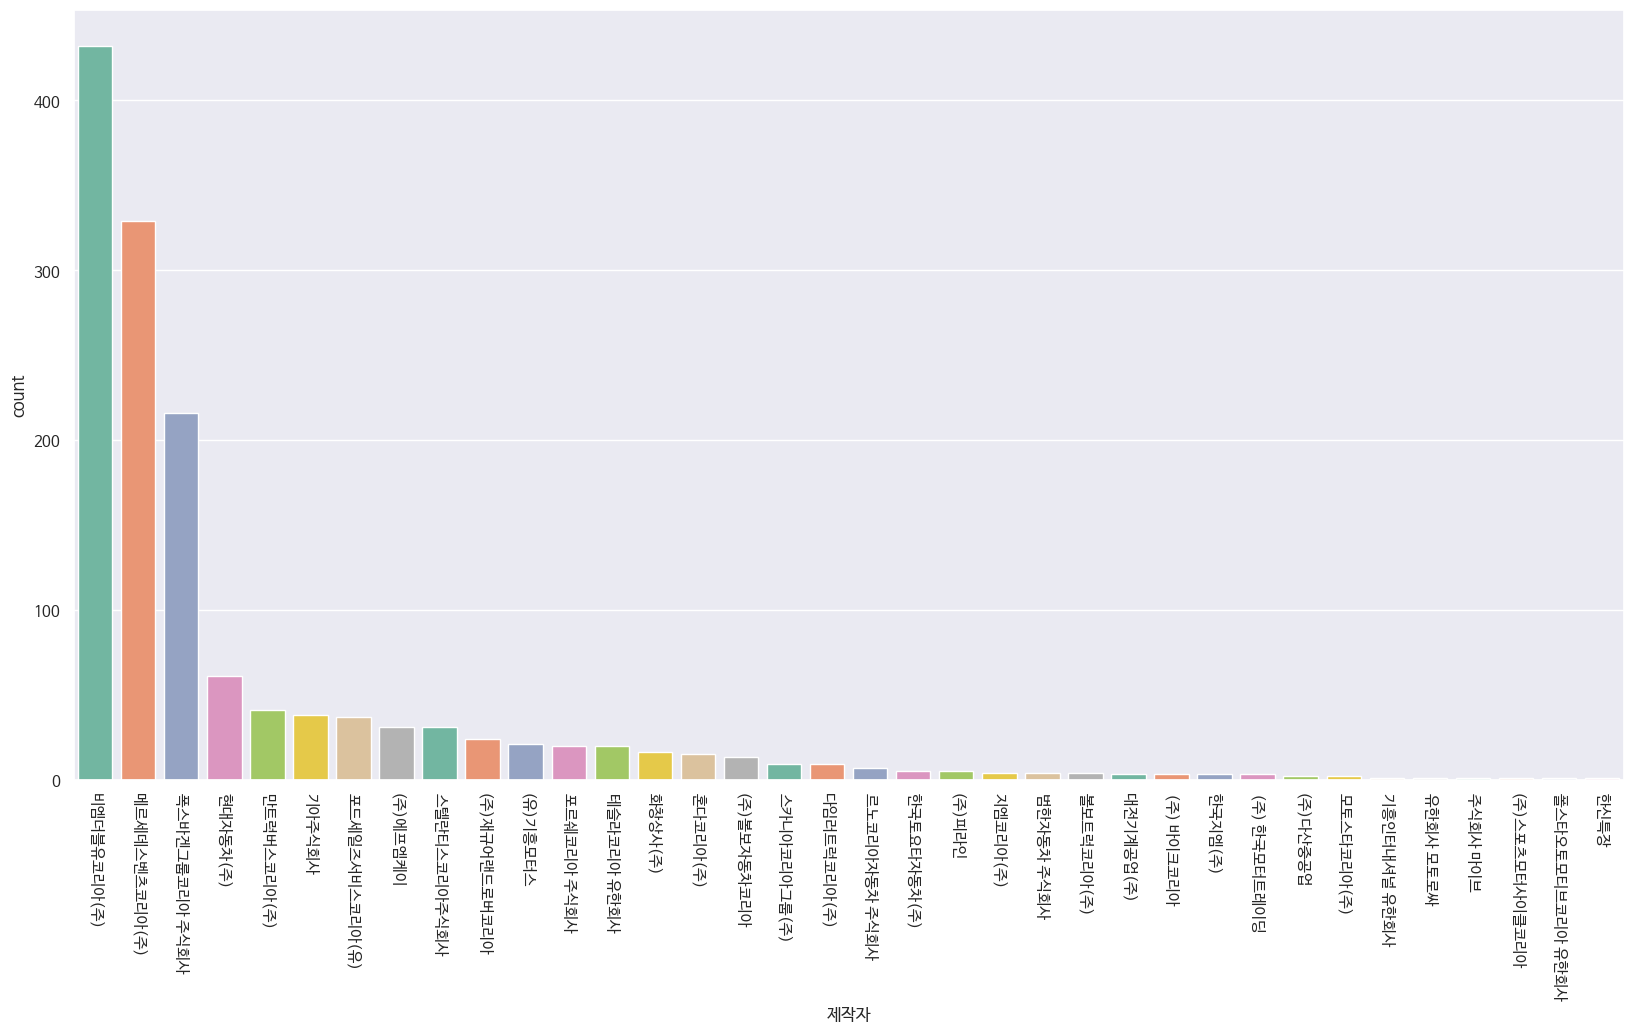

In [15]:
# 제조사 별 리콜 건수를 계산하고 시각화
pd.DataFrame(df.groupby("제작자").count()["차명"].sort_values(ascending=False)).rename(columns={"차명": "count"})


tmp = pd.DataFrame(df.groupby("제작자").count()["차명"].sort_values(ascending=False)).rename(columns={"차명": "count"})

plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="제작자", data=df, palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

In [16]:
tmp.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '폭스바겐그룹코리아 주식회사', '현대자동차(주)',
       '만트럭버스코리아(주)', '기아주식회사', '포드세일즈서비스코리아(유)', '(주)에프엠케이', '스텔란티스코리아주식회사',
       '(주)재규어랜드로버코리아', '(유)기흥모터스', '포르쉐코리아 주식회사', '테슬라코리아 유한회사', '화창상사(주)',
       '혼다코리아(주)', '(주)볼보자동차코리아', '스카니아코리아그룹(주)', '다임러트럭코리아(주)',
       '르노코리아자동차 주식회사', '한국토요타자동차(주)', '(주)피라인', '지엠코리아(주)', '범한자동차 주식회사',
       '볼보트럭코리아(주)', '대전기계공업(주)', '(주) 바이크코리아', '한국지엠(주)', '(주) 한국모터트레이딩',
       '(주)다산중공업', '모토스타코리아(주)', '기흥인터내셔널 유한회사', '유한회사 모토로싸', '주식회사 마이브',
       '(주)스포츠모터사이클코리아', '폴스타오토모티브코리아 유한회사', '한신특장'],
      dtype='object', name='제작자')

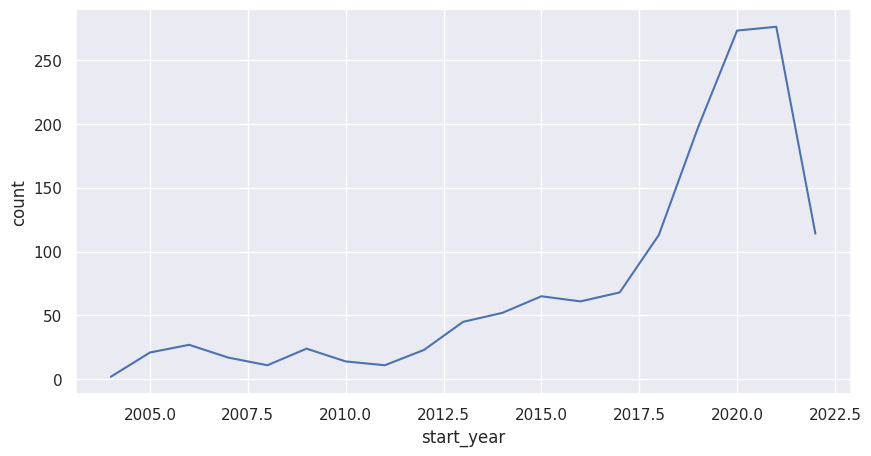

In [17]:
# 생산연도별 리콜 현황

tmp = pd.DataFrame(df.groupby("start_year").count()["차명"]).rename(columns={"차명": "count"}).reset_index()

# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
sns.lineplot(data=tmp, x="start_year", y="count")
plt.show()

In [18]:
unique_rows = df[['제작자', '리콜사유']].drop_duplicates()
print(unique_rows)

                 제작자                                               리콜사유
0           혼다코리아(주)  제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1     폭스바겐그룹코리아 주식회사  특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
6      메르세데스벤츠코리아(주)  크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
8      메르세데스벤츠코리아(주)  연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...
10    폭스바겐그룹코리아 주식회사  일부 대상 차량의 엔진컨트롤유닛 소프트웨어 오류로 EGR(배기가스 재순환 장치) 배...
...              ...                                                ...
1397  폭스바겐그룹코리아 주식회사  연료 펌프 내부 부품(임펠러)이 내구성 부족으로 파손될 수 있으며, 이로 인하여 연...
1399         한국지엠(주)  바디 컨트롤 모듈 소프트웨어 오류로 인해 전조등 점등 시 주간주행등이 꺼지지 않고 ...
1403     다임러트럭코리아(주)  가속페달의 회로기판(PCB) 설계오류로 전압상승 시 다이오드가 파괴되어 가속페달 센...
1409     비엠더블유코리아(주)  배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416  (주)스포츠모터사이클코리아  메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...

[273 rows x 2 columns]


In [19]:
new_df = df[(df['제작자']=='폭스바겐그룹코리아 주식회사') | (df['제작자']=='메르세데스벤츠코리아(주)') | (df['제작자']=='비엠더블유코리아(주)')]
new_df.tail(30)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
1379,폭스바겐그룹코리아 주식회사,A4 35 TDI,2020-07-21,2021-04-06,2022-12-19,특정 기간 동안 생산/수입된 일부 차량의 소프트웨어 업데이트 과정에서 적절하지 않은...,2020,7,21,2021,4,6,2022,12,19
1380,비엠더블유코리아(주),BMW X4 xDrive20d M Sport Package,2019-03-14,2021-07-28,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2019,3,14,2021,7,28,2022,12,22
1381,비엠더블유코리아(주),BMW X4 xDrive20d,2021-08-03,2022-03-25,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2021,8,3,2022,3,25,2022,12,22
1382,비엠더블유코리아(주),BMW X3 xDrive20d M Sport Package,2019-03-11,2021-07-24,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2019,3,11,2021,7,24,2022,12,22
1383,비엠더블유코리아(주),BMW X3 xDrive20d,2021-07-28,2022-03-28,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2021,7,28,2022,3,28,2022,12,22
1384,비엠더블유코리아(주),BMW 620d xDrive Luxury,2018-06-11,2020-06-29,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2018,6,11,2020,6,29,2022,12,22
1385,비엠더블유코리아(주),BMW 620d xDrive,2020-06-15,2022-02-02,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2020,6,15,2022,2,2,2022,12,22
1386,비엠더블유코리아(주),BMW 620d Luxury,2018-06-11,2020-06-30,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2018,6,11,2020,6,30,2022,12,22
1387,비엠더블유코리아(주),BMW 620d,2020-06-29,2022-01-26,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2020,6,29,2022,1,26,2022,12,22
1388,비엠더블유코리아(주),BMW 523d xDrive,2020-06-18,2022-01-24,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,2020,6,18,2022,1,24,2022,12,22


In [20]:
# 탑3 제조사 차량 모델별 리콜 건수
pd.DataFrame(new_df.groupby("차명").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"}).head(10)

,count
차명,
328i,25
C 300,13
328xi,11
S 350 d,10
S 580 4MATIC,10
S 400 d 4MATIC,9
S 500 4MATIC,9
C 200 4MATIC,9
Maybach S 580 4MATIC,9


In [21]:
new_tmp = pd.DataFrame(new_df.groupby("차명").count()["제작자"].sort_values(ascending=False))
new_tmp = new_tmp.rename(columns={"manufacturer": "count"}).iloc[:50]

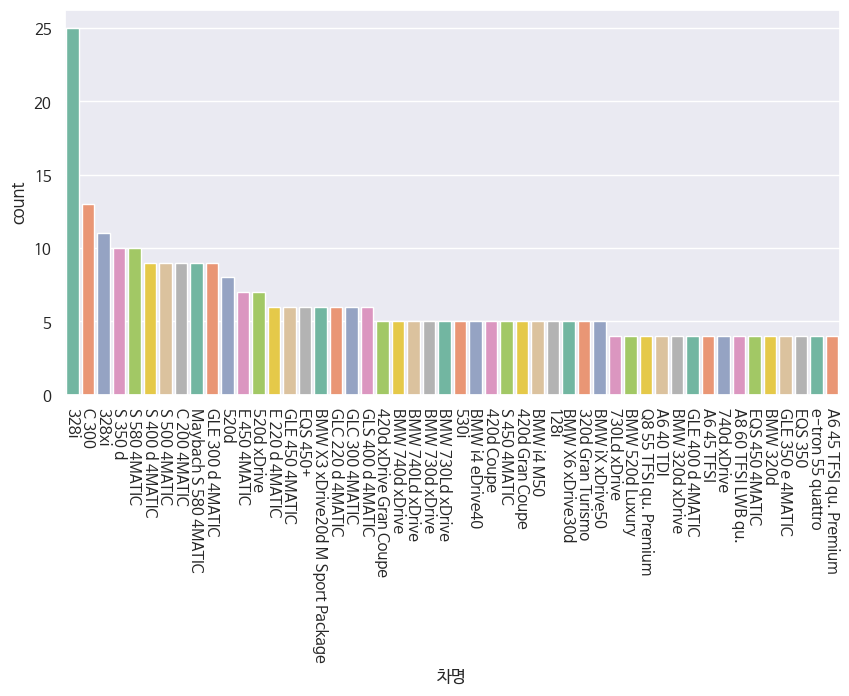

In [22]:
# 차량 모델별 리콜 건수 시각

# 그래프의 사이즈를 조절
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="차명", data=new_df[new_df.차명.isin(new_tmp.index)], palette="Set2", order=new_tmp.index)
plt.xticks(rotation=270)
plt.show()

In [26]:
maker_df = pd.DataFrame(new_df.groupby("제작자").count()["차명"].sort_values(ascending=False))
maker_df.columns = ['리콜건수']
maker_df

,리콜건수
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216


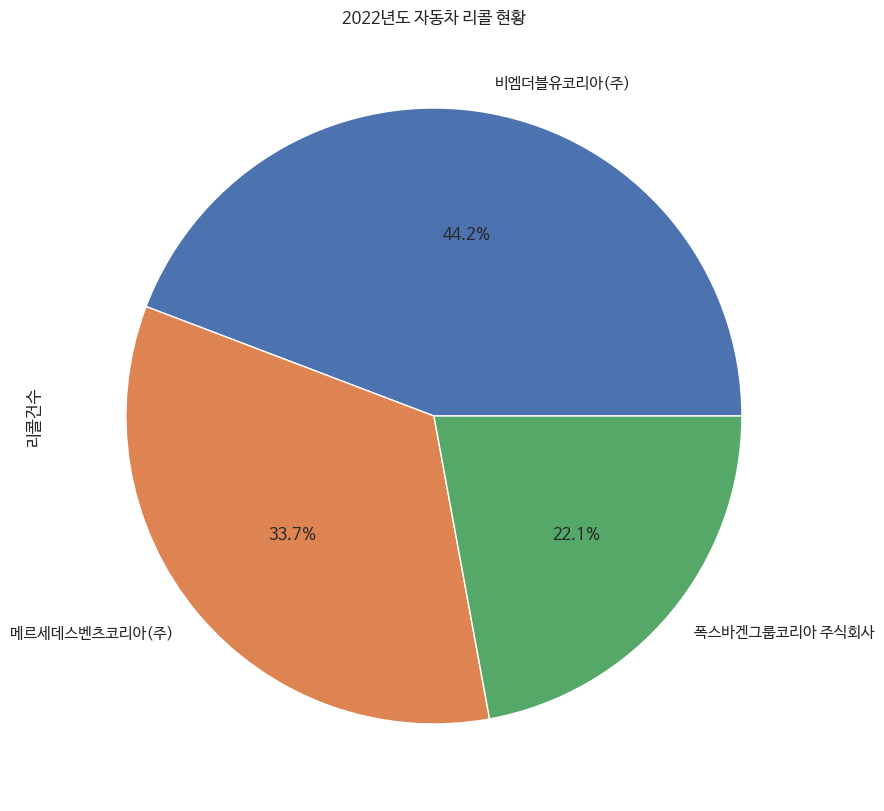

In [27]:
# 제작자별 리콜 비율
plt.figure(figsize=(10,10))

maker_df['리콜건수'].plot(kind='pie', autopct='%.1f%%')
plt.title('2022년도 자동차 리콜 현황')
plt.show()

In [30]:
# 주요 리콜 제품 생산년도를 확인하기 위해
new_df[(new_df['차명']=='C 300')| (new_df['차명']=='328xi')]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
14,메르세데스벤츠코리아(주),C 300,2021-03-15,2021-03-26,2022-01-14,엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(veh...,2021,3,15,2021,3,26,2022,1,14
16,메르세데스벤츠코리아(주),C 300,2021-03-26,2021-03-26,2022-01-14,파워트레인 컨트롤 유닛의 소프트웨어 오류로 인해 차량 운행 중 파워트레인 컨트롤 유...,2021,3,26,2021,3,26,2022,1,14
79,메르세데스벤츠코리아(주),C 300,2021-03-31,2021-03-31,2022-02-04,엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(veh...,2021,3,31,2021,3,31,2022,2,4
87,메르세데스벤츠코리아(주),C 300,2021-03-26,2021-03-26,2022-02-04,메르세데스 미 서비스(Mercedes me)를 위해 차량과 본사 서버(backend...,2021,3,26,2021,3,26,2022,2,4
244,메르세데스벤츠코리아(주),C 300,2021-03-16,2021-03-26,2022-03-01,비상 통신 모듈의 소프트웨어 오류로 인하여 비상 통신 시스템(eCall)이 작동되지...,2021,3,16,2021,3,26,2022,3,1
388,메르세데스벤츠코리아(주),C 300,2017-04-06,2017-05-30,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...,2017,4,6,2017,5,30,2022,4,8
483,메르세데스벤츠코리아(주),C 300,2021-03-12,2021-03-26,2022-04-29,오버헤드 컨트롤 패널(Overhead Control Panel)의 소프트웨어 오류로...,2021,3,12,2021,3,26,2022,4,29
508,메르세데스벤츠코리아(주),C 300,2021-03-15,2021-03-31,2022-04-29,스티어링 휠 핸즈 오프(hands-off) 감지 시스템의 소프트웨어 오류로 인하여 ...,2021,3,15,2021,3,31,2022,4,29
560,메르세데스벤츠코리아(주),C 300,2021-03-15,2021-03-31,2022-05-13,후방 SAM(Signal Acquisition and actuation Module...,2021,3,15,2021,3,31,2022,5,13
849,메르세데스벤츠코리아(주),C 300,2016-01-18,2016-01-18,2022-07-29,생산 공정 편차로 인하여 에어 서스펜션 컴프레서의 압력 방출 밸브의 표면 코팅 내성...,2016,1,18,2016,1,18,2022,7,29


In [31]:
# 생산기간이 2017년 이후인 데이터 만 추출
new_df1 = new_df[(new_df['생산기간(까지)']>'2017-01-01')]

In [32]:
# 2017년 이후 생산 차량 모델별 리콜 건수
pd.DataFrame(new_df1.groupby("차명").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"}).head(10)

,count
차명,
C 300,12
S 580 4MATIC,10
S 350 d,10
S 400 d 4MATIC,9
S 500 4MATIC,9
GLE 300 d 4MATIC,9
Maybach S 580 4MATIC,9
C 200 4MATIC,9
E 450 4MATIC,7


In [33]:
new_tmp1 = pd.DataFrame(new_df1.groupby("차명").count()["제작자"].sort_values(ascending=False))
new_tmp1 = new_tmp1.rename(columns={"manufacturer": "count"}).iloc[:50]

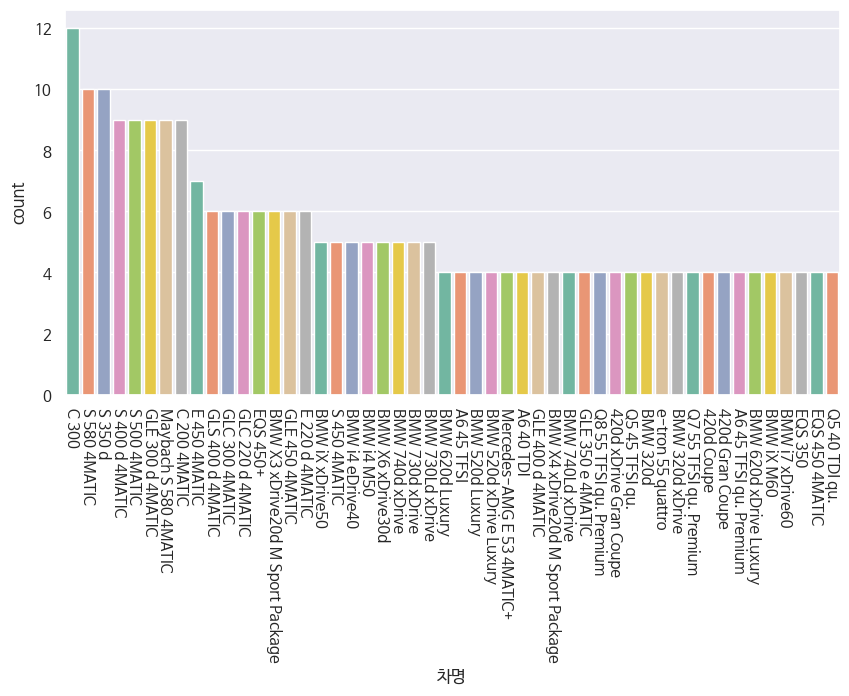

In [34]:
# 2017년 이후 생산 차량 모델별 리콜 건수 시각

# 그래프의 사이즈를 조절
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="차명", data=new_df1[new_df1.차명.isin(new_tmp1.index)], palette="Set2", order=new_tmp1.index)
plt.xticks(rotation=270)
plt.show()